# Математичне моделювання

**Тема: Прогнозування відповідності показників вина до його якості.**

**Виконав: Руденко Р. О., група КМ-81.**

**Керівник: доц. Норкін Б. В.**

## Визначення предметної області і постановка задачі

В якості предметної області було обрано дані про користувачів
розважального сайту за останні два роки. Метою даного дослідження є
прогнозування ймовірності становлення нового користувача віп клієнтом
розважального сайту.

Серед етапів підготовки даних будуть поверхневий огляд значень
датасету, очищення від "битих" та непотрібних рядків, визначення основних
характеристик, розгляд даних датасету у вигляді графіків, та статистичних
значень різних показників.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [2]:
df = pd.read_csv('data.csv')

Вивидемо таблицю з частиною інформації датасету:


In [3]:
df

,user,country_GB_AU,country_DE_FR,country_PL_TR,country_SNG,country_SCANDINAVIA,country_LATAN,country_OTHER,dep_sum_for_one_day_from_ftd,count_dep,...,age_when_ftd,cnt_pre_dep_bns,cnt_bns,cnt_low_wager,cnt_high_wager,avg_bet,count_games,count_tryed_games,source,vip
0,user_1,0,0,0,1,0,0,0,7.05,1,...,40.0,0,1,0,1,0.24,150.0,7,1,0
1,user_2,0,0,1,0,0,0,0,13.20,1,...,31.0,0,1,0,1,0.31,1975.0,1,1,0
2,user_3,0,0,1,0,0,0,0,4.91,2,...,19.0,0,0,0,0,2.45,2.0,1,0,0
3,user_4,0,0,0,0,0,0,1,47.27,2,...,29.0,0,1,0,1,1.76,527.0,4,1,0
4,user_5,0,0,1,0,0,0,0,23.84,1,...,21.0,0,1,0,1,0.18,672.0,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287225,user_287226,1,0,0,0,0,0,0,91.10,4,...,34.0,0,1,0,1,7.93,664.0,4,1,0
287226,user_287227,1,0,0,0,0,0,0,11.39,1,...,22.0,0,0,0,0,0.13,452.0,7,1,0
287227,user_287228,1,0,0,0,0,0,0,112.26,6,...,26.0,0,0,0,0,15.70,31.0,2,1,0
287228,user_287229,1,0,0,0,0,0,0,69.79,4,...,24.0,0,0,0,0,0.31,2644.0,3,1,0


## Опис даних


Таблиця містить наступні колонки: 'user', 'country_GB_AU',
'country_DE_FR', 'country_PL_TR', 'country_SNG',
'country_SCANDINAVIA', 'country_LATAN', 'country_OTHER',
'dep_sum_for_one_day_from_ftd', 'count_dep', 'count_try_dep',
'out_sum_fro_one_day_from_ftd', 'count_out', 'count_try_out',
'days_from_reg_to_ftd', 'gender_FEMALE', 'gender_MALE', 'multi_cnt',
'age_when_ftd', 'cnt_pre_dep_bns', 'cnt_bns', 'cnt_low_wager',
'cnt_high_wager', 'avg_bet', 'count_games', 'count_tryed_games', 'source',
'vip'.
* user: унікальний ідентифікатор гравця
* country_GB_AU, country_DE_FR, country_PL_TR, country_SNG, country_SCANDINAVIA, country_LATAN, country_OTHER:категоріальна відповідність гравця до одного із перелічених категорій країн
* dep_sum_for_one_day_from_ftd: сума внесених коштів за перший день гри
* count_dep: кількість успішних поповнень балансу гравцем
* count_try_dep: кількість не успішних поповнень балансу гравцем
* out_sum_fro_one_day_from_ftd: сума виведених коштів за перший день гри
* count out: кількість успішних виводів коштів з балансу гравцем
* count_try_out: кількість не успішних виводів коштів з балансу гравцем
* days_from_reg_to_ftd: кількість днів з моменту реєстрації до моменту першого внесення коштів на баланс
* gender_FEMALE, gender_MALE: категоріальна відповідність користувача до одного однієї із статей
* multi_cnt: кількість мультиаккаунтів гравця
* age_when_ftd: вік гравця в момент першого поповнення балансу
* cnt_pre_dep_bns: кількість отриманих бездепозитних бонусів
* cnt_bns: кількість отриманих бонусів після першого депозиту
* cnt_low_wager: кількість отриманих бонусів з низьким відіграшем
* cnt_high_wager: кількість отриманих бонусів з високим відіграшем
* avg_bet: середня сума ставки
* count_games: кількість ігор
* count_tryed_games: кількість спробуваних ігор
* source: шлях приходу користувача(1 - з реклами, 0 - з пошукової системи)
* vip: чи є користувач віпом(віп - користувач який перейшов певну межу сумидепозиту, для кожного регіону межа - різна)


## Підготовка даних


Дані було очищено від пустих значень на рівні SQL запиту в базу,
але давайте все-таки перевіримо датасет на можливу наявність
пустих даних:


In [4]:
df.isnull().sum()

user                            0
country_GB_AU                   0
country_DE_FR                   0
country_PL_TR                   0
country_SNG                     0
country_SCANDINAVIA             0
country_LATAN                   0
country_OTHER                   0
dep_sum_for_one_day_from_ftd    0
count_dep                       0
count_try_dep                   0
out_sum_fro_one_day_from_ftd    0
count_out                       0
count_try_out                   0
days_from_reg_to_ftd            0
gender_FEMALE                   0
gender_MALE                     0
multi_cnt                       0
age_when_ftd                    0
cnt_pre_dep_bns                 0
cnt_bns                         0
cnt_low_wager                   0
cnt_high_wager                  0
avg_bet                         0
count_games                     0
count_tryed_games               0
source                          0
vip                             0
dtype: int64

Як бачимо, всі дані цілком валідні. Додаткових очищень датасет не потребує.
Тепер ми можемо вивести основні характеристики числових параметрів.
Використаємо для цього метод describe()


In [5]:
df.describe()

,country_GB_AU,country_DE_FR,country_PL_TR,country_SNG,country_SCANDINAVIA,country_LATAN,country_OTHER,dep_sum_for_one_day_from_ftd,count_dep,count_try_dep,...,age_when_ftd,cnt_pre_dep_bns,cnt_bns,cnt_low_wager,cnt_high_wager,avg_bet,count_games,count_tryed_games,source,vip
count,287230.000000,287230.000000,287230.000000,287230.000000,287230.000000,287230.000000,287230.000000,287230.000000,287230.000000,287230.000000,...,287230.000000,287230.000000,287230.000000,287230.000000,287230.000000,287230.000000,287230.000000,287230.000000,287230.000000,287230.000000
mean,0.198935,0.080382,0.273175,0.358619,0.027051,0.010225,0.051614,72.700994,2.176291,2.846012,...,33.773063,0.127713,0.820252,0.092953,0.855012,1.731326,686.100571,5.160676,0.960314,0.089284
std,0.399199,0.271883,0.445591,0.479596,0.162234,0.100602,0.221246,302.532371,2.670458,6.510160,...,20.928414,0.361049,1.059140,0.401566,1.053266,15.396901,1201.427385,6.816261,0.195221,0.285154
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,1.000000,0.000000,...,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.750000,1.000000,0.000000,...,26.000000,0.000000,0.000000,0.000000,0.000000,0.160000,81.000000,2.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.230000,1.000000,1.000000,...,32.000000,0.000000,1.000000,0.000000,1.000000,0.340000,259.000000,3.000000,1.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,48.480000,2.000000,3.000000,...,39.000000,0.000000,1.000000,0.000000,1.000000,0.900000,765.000000,6.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31610.560000,103.000000,691.000000,...,1028.000000,9.000000,21.000000,13.000000,18.000000,3177.070000,31170.000000,365.000000,1.000000,1.000000


Ці дані не є повністю інформативними, тому побудуємо декілька
графіків, що характеризуватимуть наш набір даних. Спочатку виведемо
гістограми, які продемонструють кількості користувачів з різних
регіонів та відношення наявних в датасеті віпів до не віпів


In [6]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [7]:
regs = ['country_SNG','country_PL_TR','country_GB_AU','country_DE_FR','country_OTHER','country_SCANDINAVIA','country_LATAN']
regs_cnt = [
    df['country_SNG'].sum(),
    df['country_PL_TR'].sum(),
    df['country_GB_AU'].sum(),
    df['country_DE_FR'].sum(),
    df['country_OTHER'].sum(),
    df['country_SCANDINAVIA'].sum(),
    df['country_LATAN'].sum()
]

In [8]:
data = [go.Bar(x=regs,y=regs_cnt)]
layout = go.Layout(title = 'Кількість гравців по регіонам')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Бачимо що у виборці найбільша кількість гравців з СНГ регіону, далі йде
Польща+Туреччина, на третьому місту Британія та Австрія.


In [9]:
gend = ['Чоловіки','Жінки']
gend_cnt = [
    df['gender_MALE'].sum(),
    df['gender_FEMALE'].sum()
]

In [10]:
data = [go.Bar(x=gend,y=gend_cnt)]
layout = go.Layout(title = 'Відношення кількості чоловіків гравців до жінок')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Бачимо що переважна кількість гравців є чоловіки

In [11]:
vips = ['Not VIP','VIP']
vips_cnt = [
    len(df)-df['vip'].sum(),
    df['vip'].sum()
]

In [12]:
data = [go.Bar(x=vips,y=vips_cnt)]
layout = go.Layout(title = 'Відношення кількості віпів до не віпів')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

З графіків видно що кількість віпів у виборці набагато менше ніж не віпів що
ускладнює задачу через нерівність вихідних класів

Розглянемо певні статистичні показники деяких стовпчиків у нашому
датасеті:

In [13]:
df['dep_sum_for_one_day_from_ftd'].mean()

72.70099387250094

In [14]:
df['out_sum_fro_one_day_from_ftd'].mean()

24.968551439612785

In [15]:
df['avg_bet'].mean()

1.7313258364377089

Розглянули середню суму депозиту в день першого депозиту, середню
суму виводів в день першого депозиту, середню суму ставки в день
першого депозиту.


## Перелік існуючих методів розв'язання поставленої задачі

Прогнозування ймовірності становлення віп клієнтом являється задачою
класифікації, адже модель має прогнозувати ймовірність згідно
характеристик нового користувача.

Для розв'язання даної задачі існують наступні методи:
* метод k-найближчих сусідів (K-Nearest Neighbors)
* метод опорних векторів (Support Vector Machines)
* класифікатор дерева рішень (Decision Tree Classifier) / случайный лес (Random Forests)
* наївний байесівський метод (Naive Bayes)
* лінійний дискримінантний аналіз (Linear Discriminant Analysis)
* логічна регресія (Logistic Regression)

Метод k-найближчих сусідів (англ. k-nearest neighbor method) — простий
непараметричний класифікаційний метод, де для класифікації об'єктів у рамках
простору властивостей використовуються відстані (зазвичай евклідові),
пораховані до усіх інших об'єктів. Вибираються об'єкти, до яких відстань
найменша, і вони виділяються в окремий клас.

В машинному навчанні метод опо́рних векторів — це метод аналізу даних для
класифікації та регресійного аналізу за допомогою моделей з керованим
навчанням з пов'язаними алгоритмами навчання, які називаються
опорно-векторними машинами (ОВМ, англ. support vector machines, SVM, також
опорно-векторними мережами, англ. support vector networks)

Random forest (англ. випадковий ліс) — ансамблевий метод машинного навчання
для класифікації, регресії та інших завдань, який працює за допомогою побудови
численних дерев прийняття рішень під час тренування моделі й продукує моду
для класів (класифікацій) або усереднений прогноз (регресія) побудованих
дерев. Недоліком є схильність до перенавчання.

Наївний баєсів класифікатор — ймовірнісний класифікатор, що використовує
теорему Баєса для визначення ймовірності приналежності спостереження
(елемента вибірки) до одного з класів при припущенні (наївному) незалежності
змінних.

Дискримінантний аналіз — різновид багатовимірного аналізу, призначеного для
вирішення задач розпізнавання образів. Використовується для прийняття
рішення про те, які змінні розділюють (тобто «дискримінують») певні масиви
даних (так звані «групи»).

Логістична регресія (англ. logistic regression) — статистичний регресійний
метод, що застосовують у випадку, коли залежна змінна є бінарною, тобто може
набувати тільки двох значень (0 або 1). Є одним із класифікачних методів.
Використовувати будемо метод Random forest.

Дослідження датасету  показали, що дані не
потребують додаткових очищень.


Змінимо одну колонку датасету перерахувавши їх дані, оскільки для кожного
регіону порог входу користувача у віп зону є різним то приведемо колонку
‘dep_sum_for_one_day_from_ftd’ до якогось номінального значення поділивши
цю колонку на порог входу користувача у віп зону для кожної країни окремо, та
змінимо колонку ‘dep_sum_for_one_day_from_ftd’ на нову ‘dep_sum_perc_vip’


In [16]:
dep_sum_perc_vip = []
for i in df.values:
    if int(i[1])==1:
        dep_sum_perc_vip.append(round(float(i[9])/1000,2))
    elif int(i[2])==1:
        dep_sum_perc_vip.append(round(float(i[9])/700,2))
    elif int(i[3])==1:
        dep_sum_perc_vip.append(round(float(i[9])/500,2))
    elif int(i[4])==1:
        dep_sum_perc_vip.append(round(float(i[9])/200,2))
    elif int(i[5])==1:
        dep_sum_perc_vip.append(round(float(i[9])/500,2))
    elif int(i[6])==1:
        dep_sum_perc_vip.append(round(float(i[9])/200,2))
    elif int(i[7])==1:
        dep_sum_perc_vip.append(round(float(i[9])/300,2))
    else:
        print(i)

In [17]:
df['dep_sum_perc_vip'] = dep_sum_perc_vip
df = df[['user', 'country_GB_AU', 'country_DE_FR',
       'country_PL_TR', 'country_SNG', 'country_SCANDINAVIA', 'country_LATAN',
       'country_OTHER', 'dep_sum_perc_vip', 'count_dep',
       'count_try_dep', 'out_sum_fro_one_day_from_ftd', 'count_out',
       'count_try_out', 'days_from_reg_to_ftd', 'gender_FEMALE', 'gender_MALE',
       'multi_cnt', 'age_when_ftd', 'cnt_pre_dep_bns', 'cnt_bns',
       'cnt_low_wager', 'cnt_high_wager', 'avg_bet', 'count_games',
       'count_tryed_games', 'source', 'vip']]

Тепер датасет виглядає так


In [18]:
df

,user,country_GB_AU,country_DE_FR,country_PL_TR,country_SNG,country_SCANDINAVIA,country_LATAN,country_OTHER,dep_sum_perc_vip,count_dep,...,age_when_ftd,cnt_pre_dep_bns,cnt_bns,cnt_low_wager,cnt_high_wager,avg_bet,count_games,count_tryed_games,source,vip
0,user_1,0,0,0,1,0,0,0,0.01,1,...,40.0,0,1,0,1,0.24,150.0,7,1,0
1,user_2,0,0,1,0,0,0,0,0.00,1,...,31.0,0,1,0,1,0.31,1975.0,1,1,0
2,user_3,0,0,1,0,0,0,0,0.00,2,...,19.0,0,0,0,0,2.45,2.0,1,0,0
3,user_4,0,0,0,0,0,0,1,0.01,2,...,29.0,0,1,0,1,1.76,527.0,4,1,0
4,user_5,0,0,1,0,0,0,0,0.00,1,...,21.0,0,1,0,1,0.18,672.0,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287225,user_287226,1,0,0,0,0,0,0,0.00,4,...,34.0,0,1,0,1,7.93,664.0,4,1,0
287226,user_287227,1,0,0,0,0,0,0,0.00,1,...,22.0,0,0,0,0,0.13,452.0,7,1,0
287227,user_287228,1,0,0,0,0,0,0,0.01,6,...,26.0,0,0,0,0,15.70,31.0,2,1,0
287228,user_287229,1,0,0,0,0,0,0,0.00,4,...,24.0,0,0,0,0,0.31,2644.0,3,1,0


## Навчання моделі


Для того щоб перевірка точності моделі була вірною поділимо наш датасет на
тренувальні та тестові дані.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop(columns=['user','vip'], axis = 1).astype('float')
y = df['vip'].astype('float')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [22]:
len(X_train)

201061

In [23]:
len(X_test)

86169

Кількість рядків даних для тренування 206605, а для тесту 88545

Натренуємо нашу модель на тренувальних даних які щойно отримали:


In [24]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

## Результати роботи моделі

Для оцінки результатів точності моделі класифікації спочатку зробимо
прогнози на тестових даних які ми отримали в попередньому кроці:

In [25]:
rfc_pred = rfc.predict(X_test)

Ця функція повертає 1 або 0, 1 - при вірогідності більше-рівне 50%
становлення віпом, 0 - при вірогідності менше.

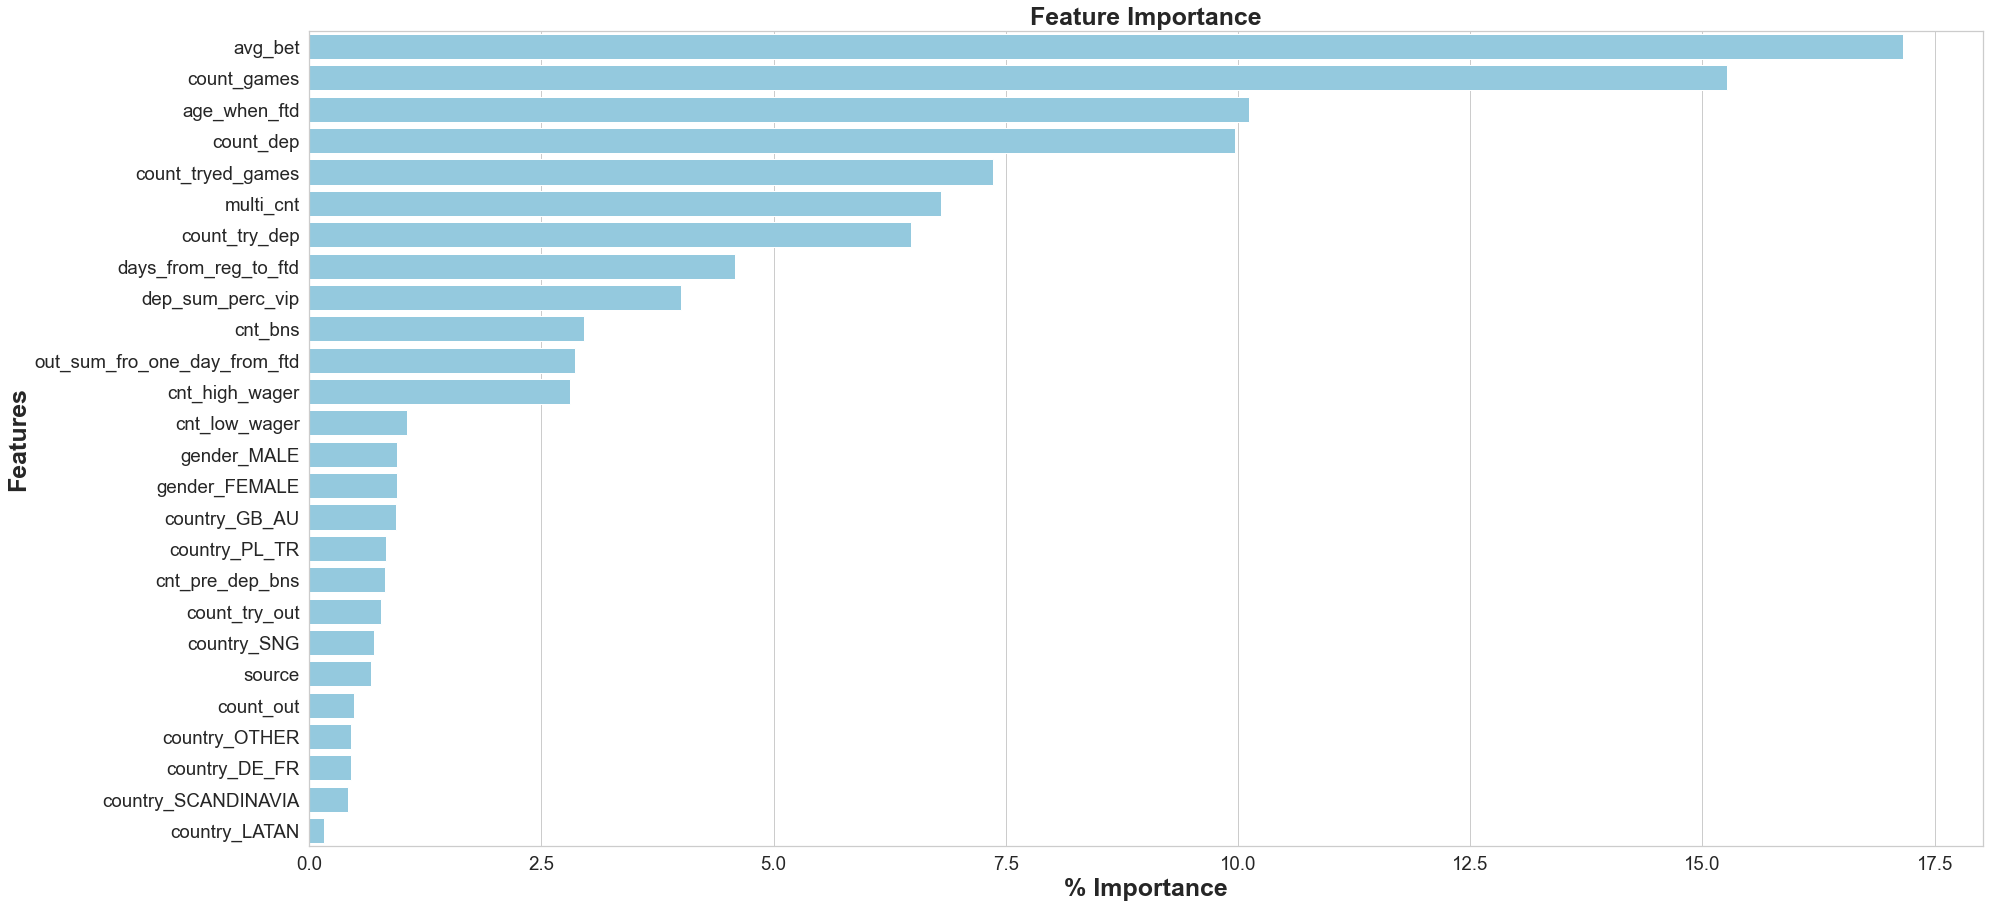

None

,Features,% Importance
0,avg_bet,17.163042
1,count_games,15.259112
2,age_when_ftd,10.122505
3,count_dep,9.963532
4,count_tryed_games,7.364966
5,multi_cnt,6.802270
6,count_try_dep,6.478502
7,days_from_reg_to_ftd,4.581476
8,dep_sum_perc_vip,4.003158
9,cnt_bns,2.961144


In [26]:
feats = {}
for feature, importance in zip(df.drop(columns=['user', 'vip'],axis=1).columns, rfc.feature_importances_):
    feats[feature] = importance*100
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: '% Importance'})
importances = importances.sort_values(by='% Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['% Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('% Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

Графік та таблиця які показують наскільки важливий кожен атрибут моделі

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
print(confusion_matrix(y_test,rfc_pred))

[[77763   712]
 [ 6015  1679]]


In [29]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     78475
         1.0       0.70      0.22      0.33      7694

    accuracy                           0.92     86169
   macro avg       0.82      0.60      0.65     86169
weighted avg       0.91      0.92      0.90     86169



Перший двомірний масив показує матрицю невідповідності


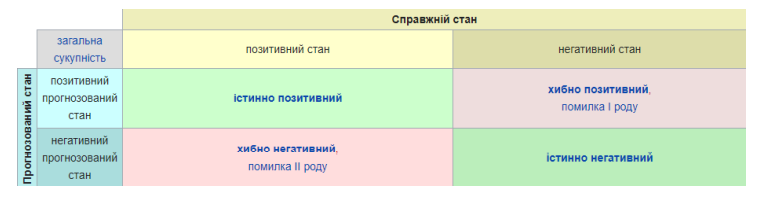

Далі йдуть певні показники які розраховуються на основі даних з попередньої
матриці, як бачимо точність моделі на достатньо високому рівні.

## Переваги та недоліки обраного методу


До переваг обраного методу розв'язання даної задачі можна віднести:
* Здатність ефективно обробляти дані з великим числом ознак і класів.
* Нечутливість до масштабування (і взагалі до будь-яких монотонних перетворень) значень ознак.
* Однаково добре обробляються як безперервні, так і дискретні ознаки.

Існують методи побудови дерев за даними з пропущеними значеннями ознак.
* Існують методи оцінювання значущості окремих ознак в моделі.

До недоліків обраного методу розв'язання даної задачі можна
віднести:
* Алгоритм схильний до перенавчання на деяких завданнях, особливо з великою кількістю шумів
* Великий розмір отримуваних моделей


## Верифікація

В даній  роботі було побудовано та навчено модель для
прогнозування ймовірності становлення нового користувача віпом. Модель було
побудовано, опираючись на постановку задачі та характеристики тренувальних
даних.
Предметна область - дані про користувачів розважального сайту за останні два
роки. Задача даної роботи - побудувати систему прогнозування ймовірності
становлення нового клієнта віп-клієнтом. В результаті, було успішно
побудовано та навчено модель для прогнозування.
В процесі побудови моделі було проаналізовано та обрано правильні моделі для
вирішення задачі класифікації, обрано метрики для оцінки ефективності,
побудовано та навчено модель.
Також, задокументовано класи бізнес-профілю Еріксона-Пенкера.


##  Валідація

Для підтвердження того, що модель коректно працює, її було протестовано на
тестових даних які не брали участь в тренуванні моделі. Отримані результати
мали дуже високу точність. Враховуючи вище описане, можна прийти до
висновку, що етап валідацї успішно пройдено.


## Висновок

У ході  роботи розроблено модель, яка була натренована на
оброблених  даних. Основна ціль -
прогнозування ймовірності становлення нового користувача віп клієнтом.
Для реалізації даної задачі було обрано метод класифікації Random forest.
Для побудови моделі використовувались наступні бібліотеки мови
програмування Python:
* pandas
* matplotlib
* numpy
* sklearn

Також було проведено етапи:
* Проаналізовано та обрано моделі для вирішення поставленої задачі ∙

Створено та навчено модель.
* Інтерпретовано результати роботи моделі.
* Проведено верифікацію та валідацію.